In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv('Housing.csv')
data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


#### In order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s, where 1 is a 'Yes' and 0 is a 'No'.

In [4]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
data[varlist] = data[varlist].apply(binary_map)

In [5]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [6]:
status = pd.get_dummies(data['furnishingstatus'])

In [7]:
status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [8]:
status = pd.get_dummies(data['furnishingstatus'], drop_first = True)

In [9]:
housing = pd.concat([data, status], axis = 1)

In [10]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [11]:
housing.drop(['furnishingstatus'], axis = 1, inplace = True)

In [12]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


#### Declaring variables

In [13]:
x = housing.iloc[:, 1:].values
y = housing.iloc[:, :1] .values

#### Standardization

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
scaler.fit(x)

StandardScaler()

In [17]:
x_scaled = scaler.transform(x)

In [18]:
x_scaled

array([[ 1.04672629,  1.40341936,  1.42181174, ...,  1.80494113,
        -0.84488844, -0.6964292 ],
       [ 1.75700953,  1.40341936,  5.40580863, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [ 2.21823241,  0.04727831,  1.42181174, ...,  1.80494113,
         1.18358821, -0.6964292 ],
       ...,
       [-0.70592066, -1.30886273, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615],
       [-1.03338891,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844, -0.6964292 ],
       [-0.5998394 ,  0.04727831, -0.57018671, ..., -0.55403469,
        -0.84488844,  1.43589615]])

#### Regression with scaled features

In [19]:
reg = LinearRegression()
reg.fit(x_scaled,y)

LinearRegression()

In [20]:
reg.coef_

array([[ 529330.60363748,   84642.78885355,  495817.70908536,
         390748.2656748 ,  146735.42974425,  114950.32935761,
         167040.77163767,  178965.10323907,  401991.91011607,
         238532.39119856,  276197.74367233,  -22847.00683726,
        -192857.24250658]])

In [21]:
reg.intercept_

array([4766729.24770642])

In [22]:
reg.predict([[9960,3,2,2,1,0,1,0,0,2,1,1,0]])

array([[5.27997079e+09]])

#### Regression itself

In [23]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression()

In [24]:
reg.coef_

array([[ 2.44139386e+02,  1.14787560e+05,  9.87668107e+05,
         4.50848003e+05,  4.21272589e+05,  3.00525860e+05,
         3.50106904e+05,  8.55447145e+05,  8.64958311e+05,
         2.77107101e+05,  6.51543800e+05, -4.63446200e+04,
        -4.11234386e+05]])

In [25]:
reg.intercept_

array([42771.69391811])

In [26]:
reg.predict([[9960,3,2,2,1,0,1,0,0,2,1,1,0]])

array([[7626587.75745807]])

### OLS

In [29]:
import statsmodels.api as sm
a = sm.add_constant(x)
results = sm.OLS(y,x).fit()

In [30]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.957
Method:                 Least Squares   F-statistic:                              924.4
Date:                Tue, 27 Feb 2024   Prob (F-statistic):                        0.00
Time:                        22:24:16   Log-Likelihood:                         -8331.5
No. Observations:                 545   AIC:                                  1.669e+04
Df Residuals:                     532   BIC:                                  1.674e+04
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1           245.1015     23.528     10.417      0.000     198.882     291.321
x2          1.211e+05    6.1e+04      1.985      0.048    1225.410    2.41e+05
x3          9.907e+05   1.02e+05      9.753      0.000    7.91e+05    1.19e+06
x4          4.512e+05   6.41e+04      7.044      0.000    3.25e+05    5.77e+05
x5          4.308e+05   1.29e+05      3.329      0.001    1.77e+05    6.85e+05
x6          2.997e+05   1.31e+05      2.279      0.023    4.14e+04    5.58e+05
x7          3.517e+05    1.1e+05      3.206      0.001    1.36e+05    5.67e+05
x8          8.556e+05   2.23e+05      3.837      0.000    4.18e+05    1.29e+06
x9          8.642e+05   1.08e+05      7.990      0.000    6.52e+05    1.08e+06
x10         2.763e+05   5.83e+04      4.742      0.000    1.62e+05    3.91e+05
x11         6.502e+05   1.15e+05      5.640      0.000    4.24e+05    8.77e+05
x12        -3.988e+04   1.09e+05     -0.364      0.716   -2.55e+05    1.75e+05
x13        -4.023e+05   1.13e+05     -3.549      0.000   -6.25e+05    -1.8e+05
==============================================================================
Omnibus:                       96.834   Durbin-Watson:                   1.215
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              254.535
Skew:                           0.887   Prob(JB):                     5.35e-56
Kurtosis:                       5.840   Cond. No.                     2.74e+04
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Calculating the R-Squared

In [31]:
reg.score(x,y)

0.6818018485540142

#### Formula for Adjusted R^2

In [32]:
r2 = reg.score(x,y)
n = x.shape[0]
p = x.shape[1]

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.6740116866542065

#### Multiple Linear regression pvalues and Feature Scaling

In [34]:
from sklearn.feature_selection import f_regression

In [35]:
f_regression(x,y)

C:\Users\mskum\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([218.88408118,  84.25102178, 198.65452062, 116.78040217,
         52.49183918,  37.92827585,  19.68856916,   4.74486966,
        140.16272089,  94.14332782,  66.25864622,   2.20925846,
         46.40328768]),
 array([7.38822540e-42, 9.08030186e-19, 1.13932184e-38, 8.66839738e-25,
        1.49010415e-12, 1.42911364e-09, 1.10410519e-05, 2.98152390e-02,
        6.31096985e-29, 1.23837844e-20, 2.71837447e-15, 1.37764974e-01,
        2.56180043e-11]))

In [36]:
p_values = f_regression(x,y)[1]
p_values

C:\Users\mskum\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([7.38822540e-42, 9.08030186e-19, 1.13932184e-38, 8.66839738e-25,
       1.49010415e-12, 1.42911364e-09, 1.10410519e-05, 2.98152390e-02,
       6.31096985e-29, 1.23837844e-20, 2.71837447e-15, 1.37764974e-01,
       2.56180043e-11])

In [37]:
p_values.round(3)

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.03 , 0.   ,
       0.   , 0.   , 0.138, 0.   ])

#### Feature scaling with F-reg and Graph

In [38]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest
from matplotlib import pyplot

In [39]:
f_regression(x,y)

C:\Users\mskum\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(array([218.88408118,  84.25102178, 198.65452062, 116.78040217,
         52.49183918,  37.92827585,  19.68856916,   4.74486966,
        140.16272089,  94.14332782,  66.25864622,   2.20925846,
         46.40328768]),
 array([7.38822540e-42, 9.08030186e-19, 1.13932184e-38, 8.66839738e-25,
        1.49010415e-12, 1.42911364e-09, 1.10410519e-05, 2.98152390e-02,
        6.31096985e-29, 1.23837844e-20, 2.71837447e-15, 1.37764974e-01,
        2.56180043e-11]))

In [40]:
fs = SelectKBest(score_func=f_regression, k='all').fit(x,y)

C:\Users\mskum\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
x_new = fs.transform(x)
fs.score_func


<function sklearn.feature_selection._univariate_selection.f_regression(X, y, *, center=True, force_finite=True)>

Feature 0: 218.884081
Feature 1: 84.251022
Feature 2: 198.654521
Feature 3: 116.780402
Feature 4: 52.491839
Feature 5: 37.928276
Feature 6: 19.688569
Feature 7: 4.744870
Feature 8: 140.162721
Feature 9: 94.143328
Feature 10: 66.258646
Feature 11: 2.209258
Feature 12: 46.403288


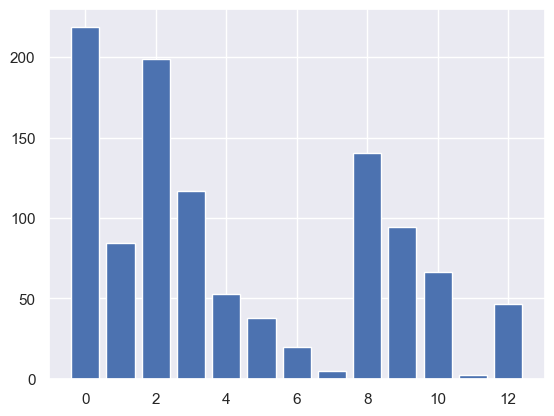

In [42]:
for i in range(len(fs.scores_)): 
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#### RMSE

In [43]:
#split for rows
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=1234)

In [44]:
#Train the simple linear reg
std_reg= LinearRegression()

In [45]:
#provide training data
std_reg.fit(x_train,y_train)

LinearRegression()

In [46]:
#predict the result
y_pred = std_reg.predict(x_test)
y_pred

array([[2168257.78857405],
       [5542789.10594613],
       [8145599.71838138],
       [7298946.60603716],
       [3291209.13267346],
       [9121118.9354862 ],
       [5364286.70018569],
       [3891555.49226444],
       [6444145.29463645],
       [5717712.69622233],
       [3672568.9275474 ],
       [4619762.42571347],
       [7064087.20007964],
       [6571738.46520916],
       [4184596.41936231],
       [4236640.47336783],
       [4488215.77936277],
       [5073638.98609639],
       [4121350.31301004],
       [3058191.91371917],
       [7228029.62105388],
       [3601047.37432273],
       [4985999.51465052],
       [4907776.34553426],
       [2094134.03207107],
       [5814861.89058378],
       [6165658.00225183],
       [7320820.10774711],
       [5399422.49111515],
       [6596562.9752455 ],
       [4541438.82200284],
       [6489130.90444914],
       [2635166.88597614],
       [3512856.99982227],
       [3284451.39582559],
       [3085490.74985078],
       [6169663.24009617],
 

In [47]:
#get the R-squared
mlr_score = std_reg.score(x_test,y_test)

In [48]:
mlr_coef = std_reg.coef_
mlr_int = std_reg.intercept_

In [49]:
mlr_coef

array([[ 2.47770999e+02,  1.11704493e+05,  8.50986345e+05,
         5.12170911e+05,  3.90056702e+05,  3.72878152e+05,
         4.07951571e+05,  7.79279126e+05,  9.17025418e+05,
         2.76908263e+05,  6.62132356e+05,  5.61680695e+04,
        -4.66753231e+05]])

In [51]:
mlr_int

array([74704.75408066])

In [52]:
from sklearn.metrics import mean_squared_error
import math

mlr_rmse = math.sqrt(mean_squared_error(y_test,y_pred))
mlr_rmse

1132792.4059821772

In [53]:
mlr_score

0.6306363840782727

Text(0, 0.5, 'y_pred')

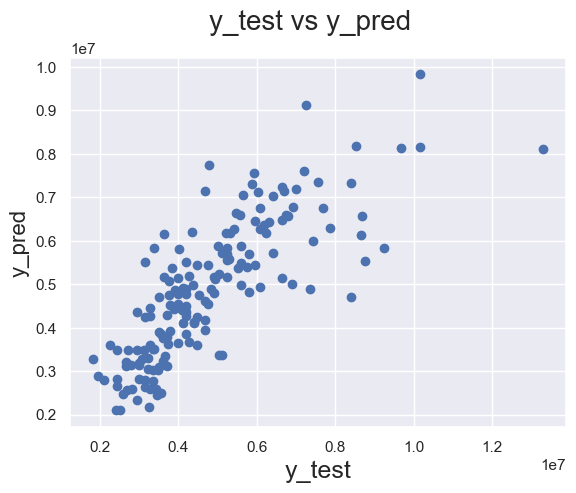

In [55]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16) 